In [34]:
import numpy as np
import numpy
import pandas as pd
from PIL import Image
import pathlib
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.tree import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from xgboost import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import *
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
train_data_dir = "/content/drive/MyDrive/Datasets/preprocessed_data"
image_size = (224,224)

dataset = image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
)

Found 12763 files belonging to 41 classes.


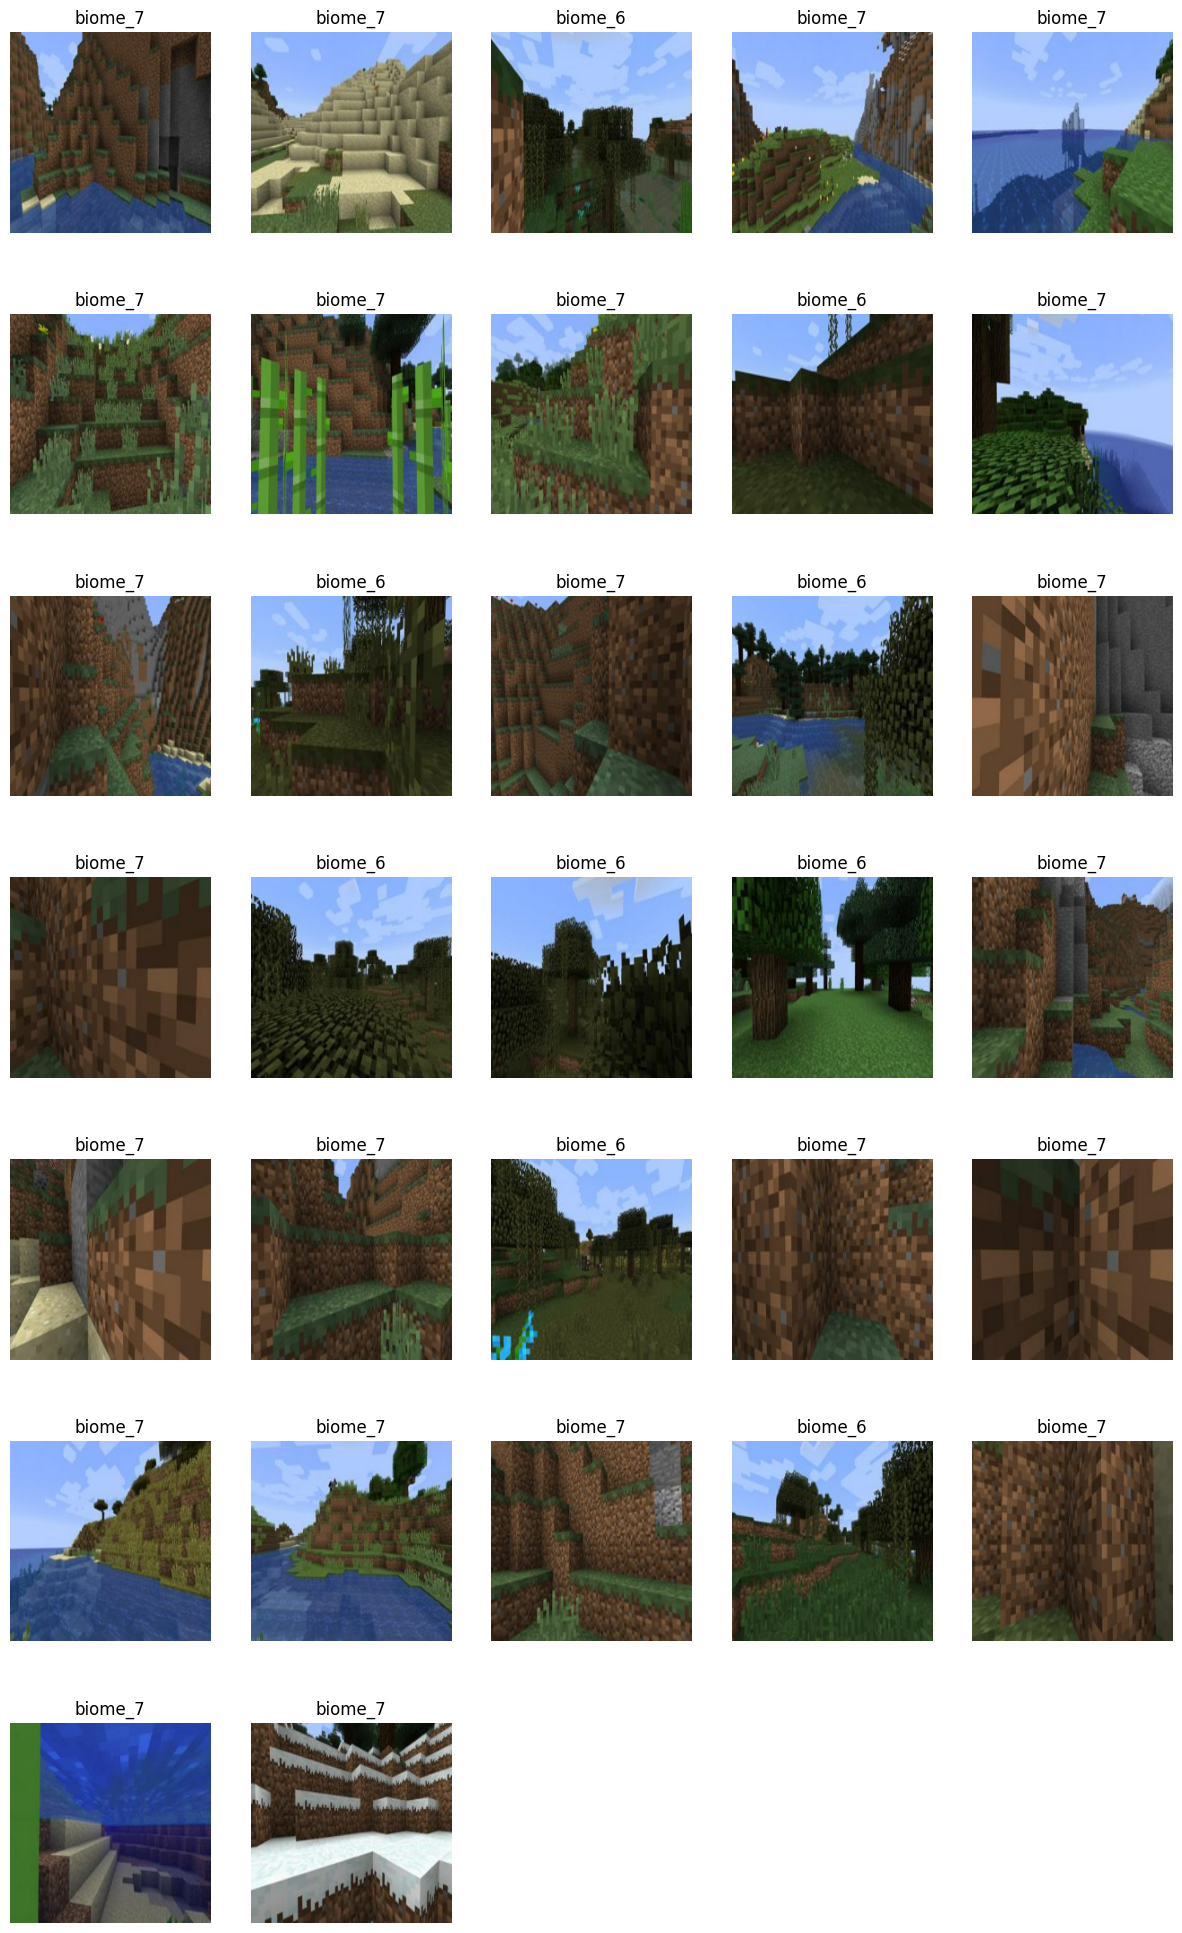

In [20]:
plt.figure(figsize=(15, 25))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(32):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
train_data_dir = "/content/drive/MyDrive/Datasets/preprocessed_data"
image_size = (224, 224)

train = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="training",
    label_mode="int",
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="validation",
    label_mode="int",
    image_size=image_size
)

Found 1016 files belonging to 41 classes.
Using 813 files for training.
Found 1016 files belonging to 41 classes.
Using 203 files for validation.


In [31]:
import tf_keras as tfk
import tensorflow_hub as hub
output_shape = 41
input_size = (None, 224, 224, 3)
model_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

model = tfk.Sequential([
        hub.KerasLayer(model_url),
                       tfk.layers.Dense(units=output_shape, activation='softmax')
])

model.compile(
        loss=tfk.losses.CategoricalCrossentropy(),
        optimizer=tfk.optimizers.Adam(),
        metrics=['accuracy']
)

model.build(input_size)